# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [35]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [36]:
# Set DepDel15 to be true if DepDelay is greater than 15, otherwise set to false.
df_flights.DepDel15 = df_flights.DepDelay > 15
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,False,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,False,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,False,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,True,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,False,728,-9,0,0


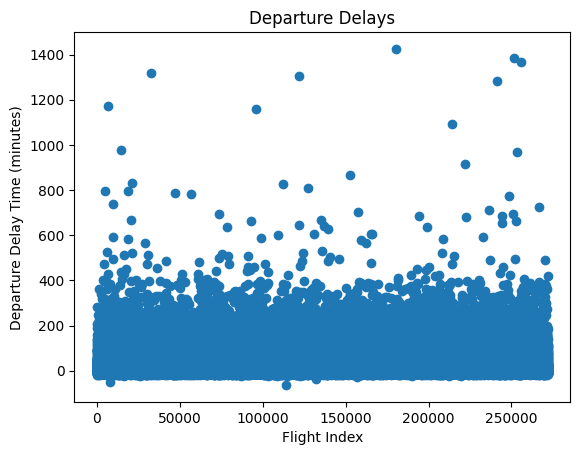

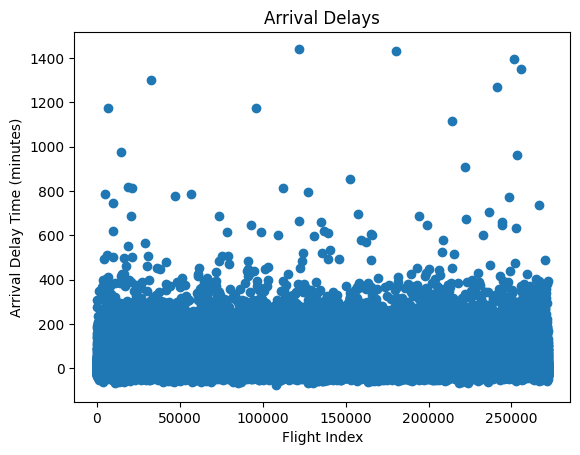

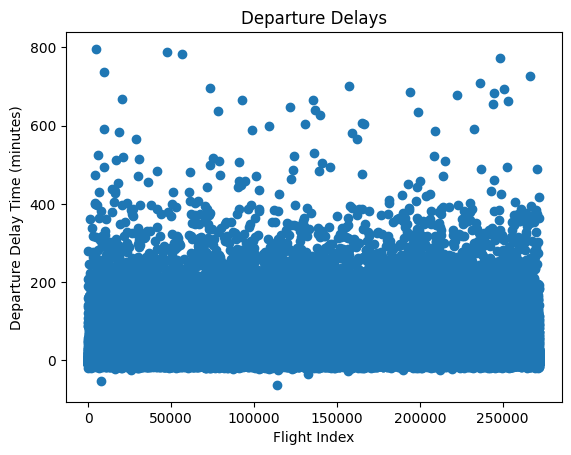

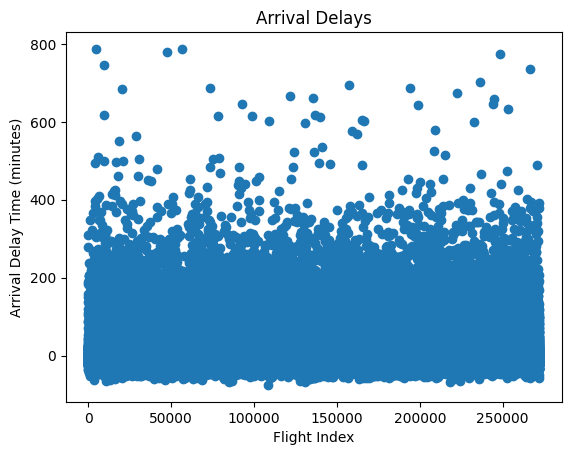

<Figure size 640x480 with 0 Axes>

In [38]:
from matplotlib import pyplot as plt

dep_del = df_flights.DepDelay
arr_del = df_flights.ArrDelay

# Plot departure delay times
plt.title("Departure Delays")
plt.xlabel("Flight Index")
plt.ylabel("Departure Delay Time (minutes)")
plt.scatter(x=df_flights.index, y=dep_del)
plt.show()
plt.clf()

# Plot arrival delay times
plt.title("Arrival Delays")
plt.xlabel("Flight Index")
plt.ylabel("Arrival Delay Time (minutes)")
plt.scatter(x=df_flights.index, y=arr_del)
plt.show()
plt.clf()

# Remove rows where departure or arrival delay is over 800 minutes.
df_flights = df_flights[(df_flights.DepDelay < 800) & (df_flights.ArrDelay < 800)]

# Replot

dep_del = df_flights.DepDelay
arr_del = df_flights.ArrDelay

# Plot departure delay times
plt.title("Departure Delays")
plt.xlabel("Flight Index")
plt.ylabel("Departure Delay Time (minutes)")
plt.scatter(x=df_flights.index, y=dep_del)
plt.show()
plt.clf()

# Plot arrival delay times
plt.title("Arrival Delays")
plt.xlabel("Flight Index")
plt.ylabel("Arrival Delay Time (minutes)")
plt.scatter(x=df_flights.index, y=arr_del)
plt.show()
plt.clf()



Mean departure delay: 10.28308749167963
Mean arrival delay: 6.4287610831007305


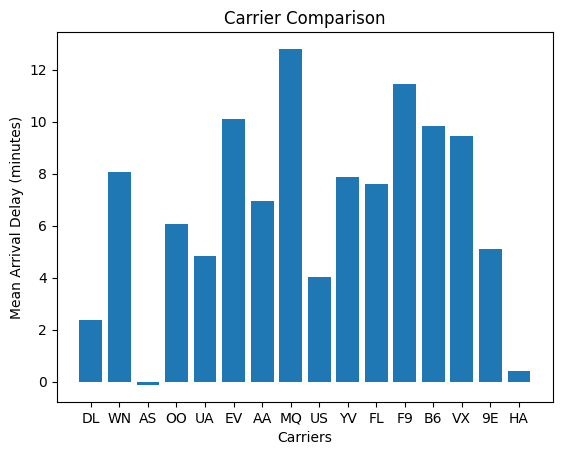

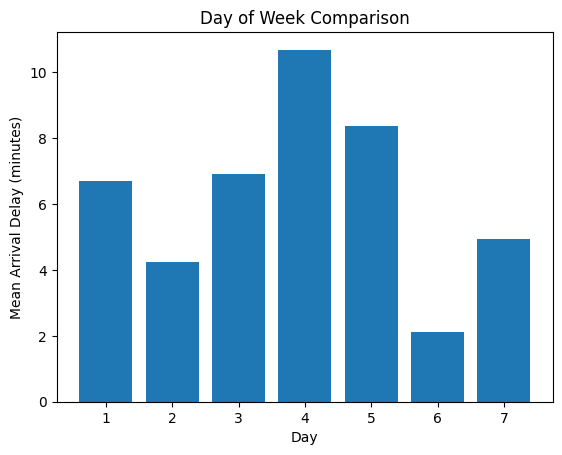

In [46]:
import numpy as np

# Mean departure and arrival delays
print(f'Mean departure delay: {df_flights.DepDelay.mean()}')
print(f'Mean arrival delay: {df_flights.ArrDelay.mean()}')

# Carrier performance in terms of arrival delay

carriers = df_flights.Carrier.unique()

carrier_means = np.empty(len(carriers))
for i in range(len(carriers)):
    carrier_means[i] = df_flights[df_flights.Carrier == carriers[i]].ArrDelay.mean()

plt.title("Carrier Comparison")
plt.xlabel("Carriers")
plt.ylabel("Mean Arrival Delay (minutes)")
plt.bar(x=carriers, height=carrier_means)
plt.show()

# Arrival delays on days of the week

days = df_flights.DayOfWeek.unique()

day_means = np.empty(len(days))
for i in range(len(days)):
    day_means[i] = df_flights[df_flights.DayOfWeek == days[i]].ArrDelay.mean()

plt.title("Day of Week Comparison")
plt.xlabel("Day")
plt.ylabel("Mean Arrival Delay (minutes)")
plt.bar(x=days, height=day_means)
plt.show()